
`Portfolio 4` is based on the analysis of the data on cars. We will be analysing and visualising the data and build a predictive model.
<br>
The data contains the following information information:

### Attribute Information:
* __model__ - Ford Car Brands
* __year__ - Production Year
* __price__ - Price of car in $
* __transmission__ - Automatic,Manual, Semi-Auto
* __mileage__ - Number of miles traveled
* __fuel_Type__ - Petrol,Diesel,Hybrid,Electric,Other
* __tax__ - Annual Tax
* __mpg__ -  Miles per Gallon
* __engineSize__ -  Car's Engine Size

We'll use this to explore the Pandas DataFrame options for selecting and plotting data and for computing statistics over columns.

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[10,5]
from matplotlib import pyplot

In [114]:
#read the data set
data= pd.read_csv('ford/ford.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [115]:
#showing the tail of the dataset
data.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [116]:
#dropping anu null values if present.
data.dropna()
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

checking the missing data for further data analysis. It is quite common that some of the input records are incomplete in the sense that certain fields are missing or have input error.

__Print the length of the data:__

In [117]:
print("The length of the ford data set is:",len(data))

The length of the ford data set is: 17966


__print the data column names:__

In [118]:
print(data.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


__print the data information:__

In [119]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB
None


In [120]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


## Ford data Analysis

Looking at the data, we can see that there are many outliers, We need to remove it in order to perform the analysis correctly.
By removing the outliers we mean discarding values that lie a long way from the median or mean value.
- First, let's learn more about the cars and it's production, model, price, kind of transmission, engine size, fuel type. 
<br>
- Secondly, we will remove the outliers present in the dataset.
<br>
- We will then perform the visualisation of the data for more understanding.

__Descriptive statistics:__
<br>
Count the values of the features present in the dataset to get an idea of how the data is distributed.

In [121]:
#counting model
data['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [122]:
#counting the types of the fuel
data['fuelType'].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [123]:
#Counting the production of cars each year
data['year'].value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: year, dtype: int64

In [124]:
#counting the number of transmission
data['transmission'].value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [125]:
#counting the number of engine size
data['engineSize'].value_counts()

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

__Removing outliers:__

In [126]:
cols= ['price','mileage','tax','mpg','year']
Q1 = data[cols].quantile(0.25)
Q3= data[cols].quantile(0.75)
IQR = Q3 - Q1
clean_data=data[~((data[cols]<(Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 *IQR))).any(axis=1)]

In [127]:
#length of the data after removing the outliers
clean_data.shape

(16507, 9)

__counting the number of unique values:__

In [128]:
#checking the unique values
year=clean_data['year'].unique()
print('The number of unique year is',year.size)
model=clean_data['model'].unique()
print('The number of unique model is',model.size)

transmission=clean_data['transmission'].unique()
print('The number of unique transmission is',transmission.size)

fuelType=clean_data['fuelType'].unique()
print('The numebr of unique fuelType is',fuelType.size)

The number of unique year is 8
The number of unique model is 20
The number of unique transmission is 3
The numebr of unique fuelType is 5


## Visualisation of the data

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

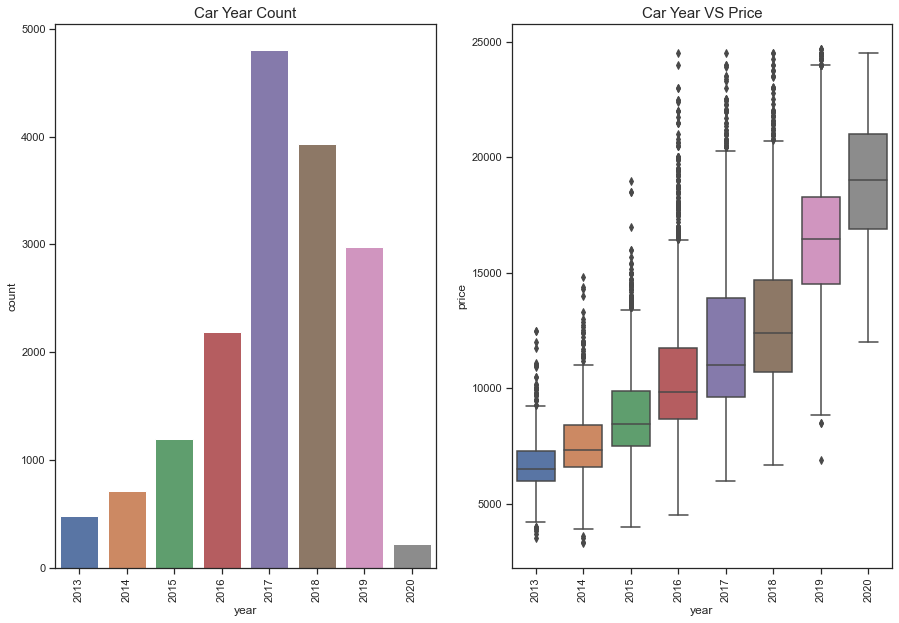

In [130]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

#count plot showing the count of the cars every year
sns.countplot(x=clean_data.year,ax=axes[0])
axes[0].set_title('Car Year Count', fontsize=15)
axes[0].tick_params(axis='x',rotation=90)

#box plot showing the price vs year of the cars
sns.boxplot(x=clean_data.year,y=clean_data.price,ax=axes[1])
axes[1].set_title('Car Year VS Price',fontsize=15)
axes[1].tick_params(axis='x',rotation=90)

1. The count plot, in the left shows that there was an increase of the production till 2017, and then it decreases after that.
2. The boxploy shows that ss the year increases, the price also increases.

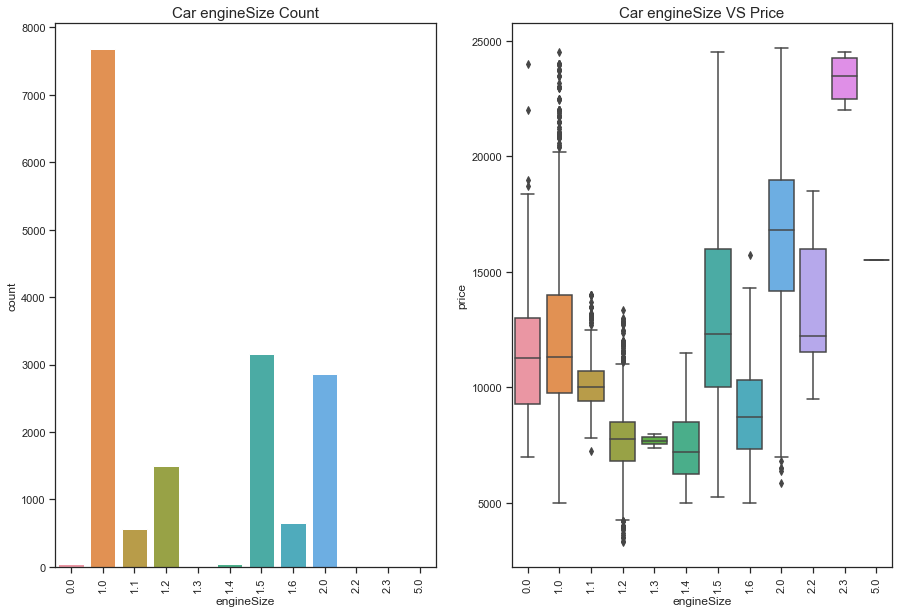

In [131]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

#count plot showing the count of the engine 
sns.countplot(x=clean_data.engineSize,ax=axes[0])
axes[0].set_title('Car engineSize Count',fontsize=15)
axes[0].tick_params(axis='x',rotation=90)

#boxplot showing engine VS price
sns.boxplot(x=clean_data.engineSize,y=clean_data.price,ax=axes[1])
axes[1].set_title('Car engineSize VS Price', fontsize=15)
axes[1].tick_params(axis='x',rotation=90)

The cars with engine size of 1.0, 1.5 and 2.0 are very popular. We can also see that the price of bigger engines have more price except for 1.2 1.3 and 1.4, here the price has decresed.

(0.0, 25759.75)

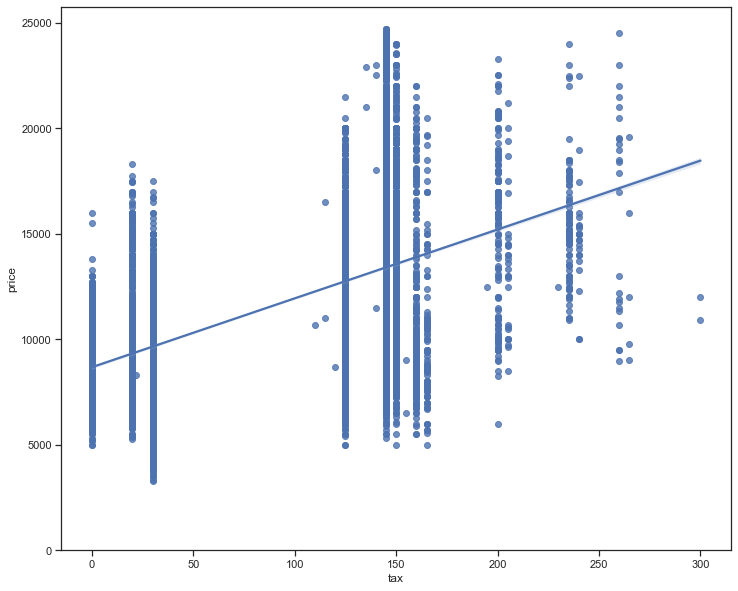

In [132]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

#tax VS price(of the cars)
pyplot.figure(figsize=(12, 10))
sns.regplot(x="tax", y="price", data=clean_data)
pyplot.ylim(0,)

There is an upword slooping in the price VS tax plot.
We can say that the price of the car increases if there increase in tax.

__vilualisation of the categorical features:__

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Model')

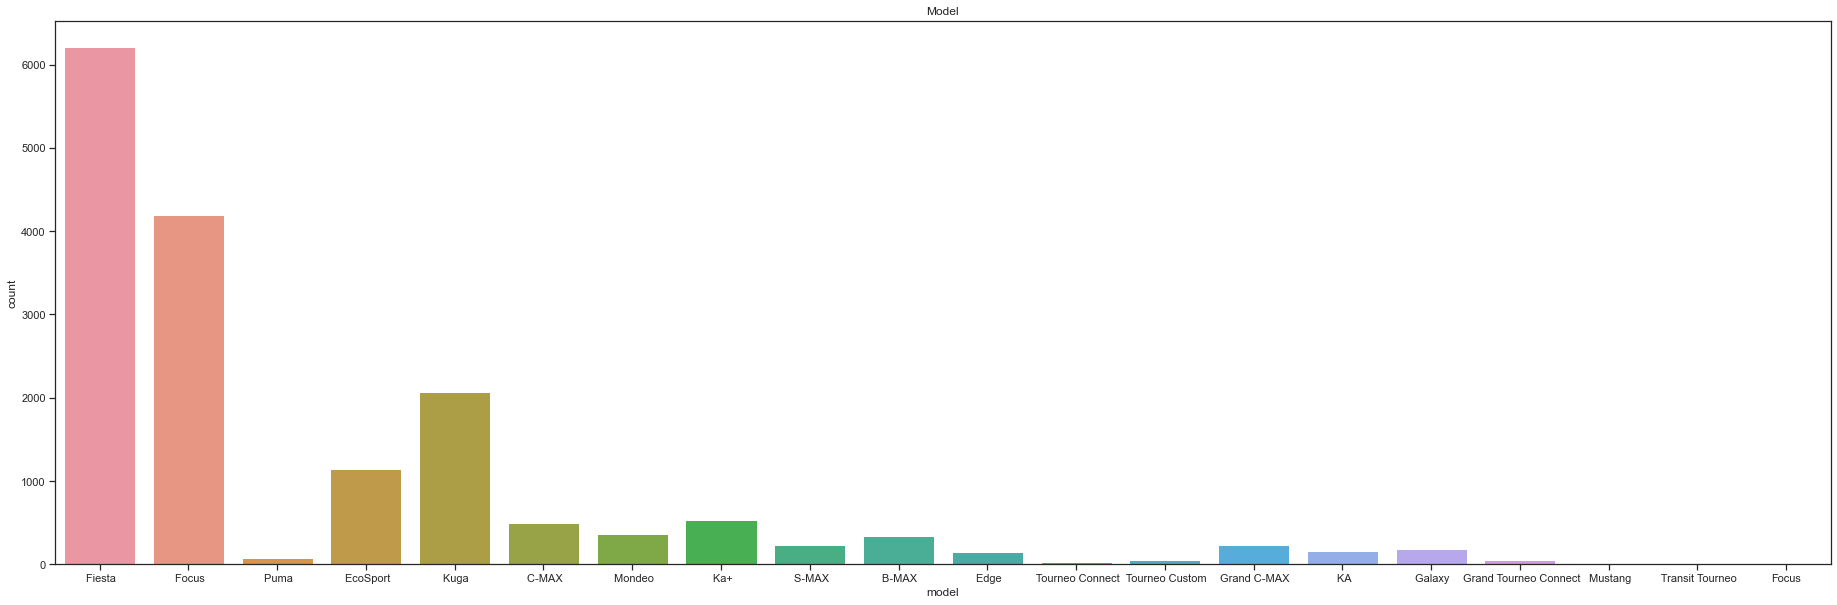

In [134]:
plt.figure(figsize=(70,10))
plt.subplot(1,2,2)
sns.countplot(x=clean_data.model)
plt.title('Model')

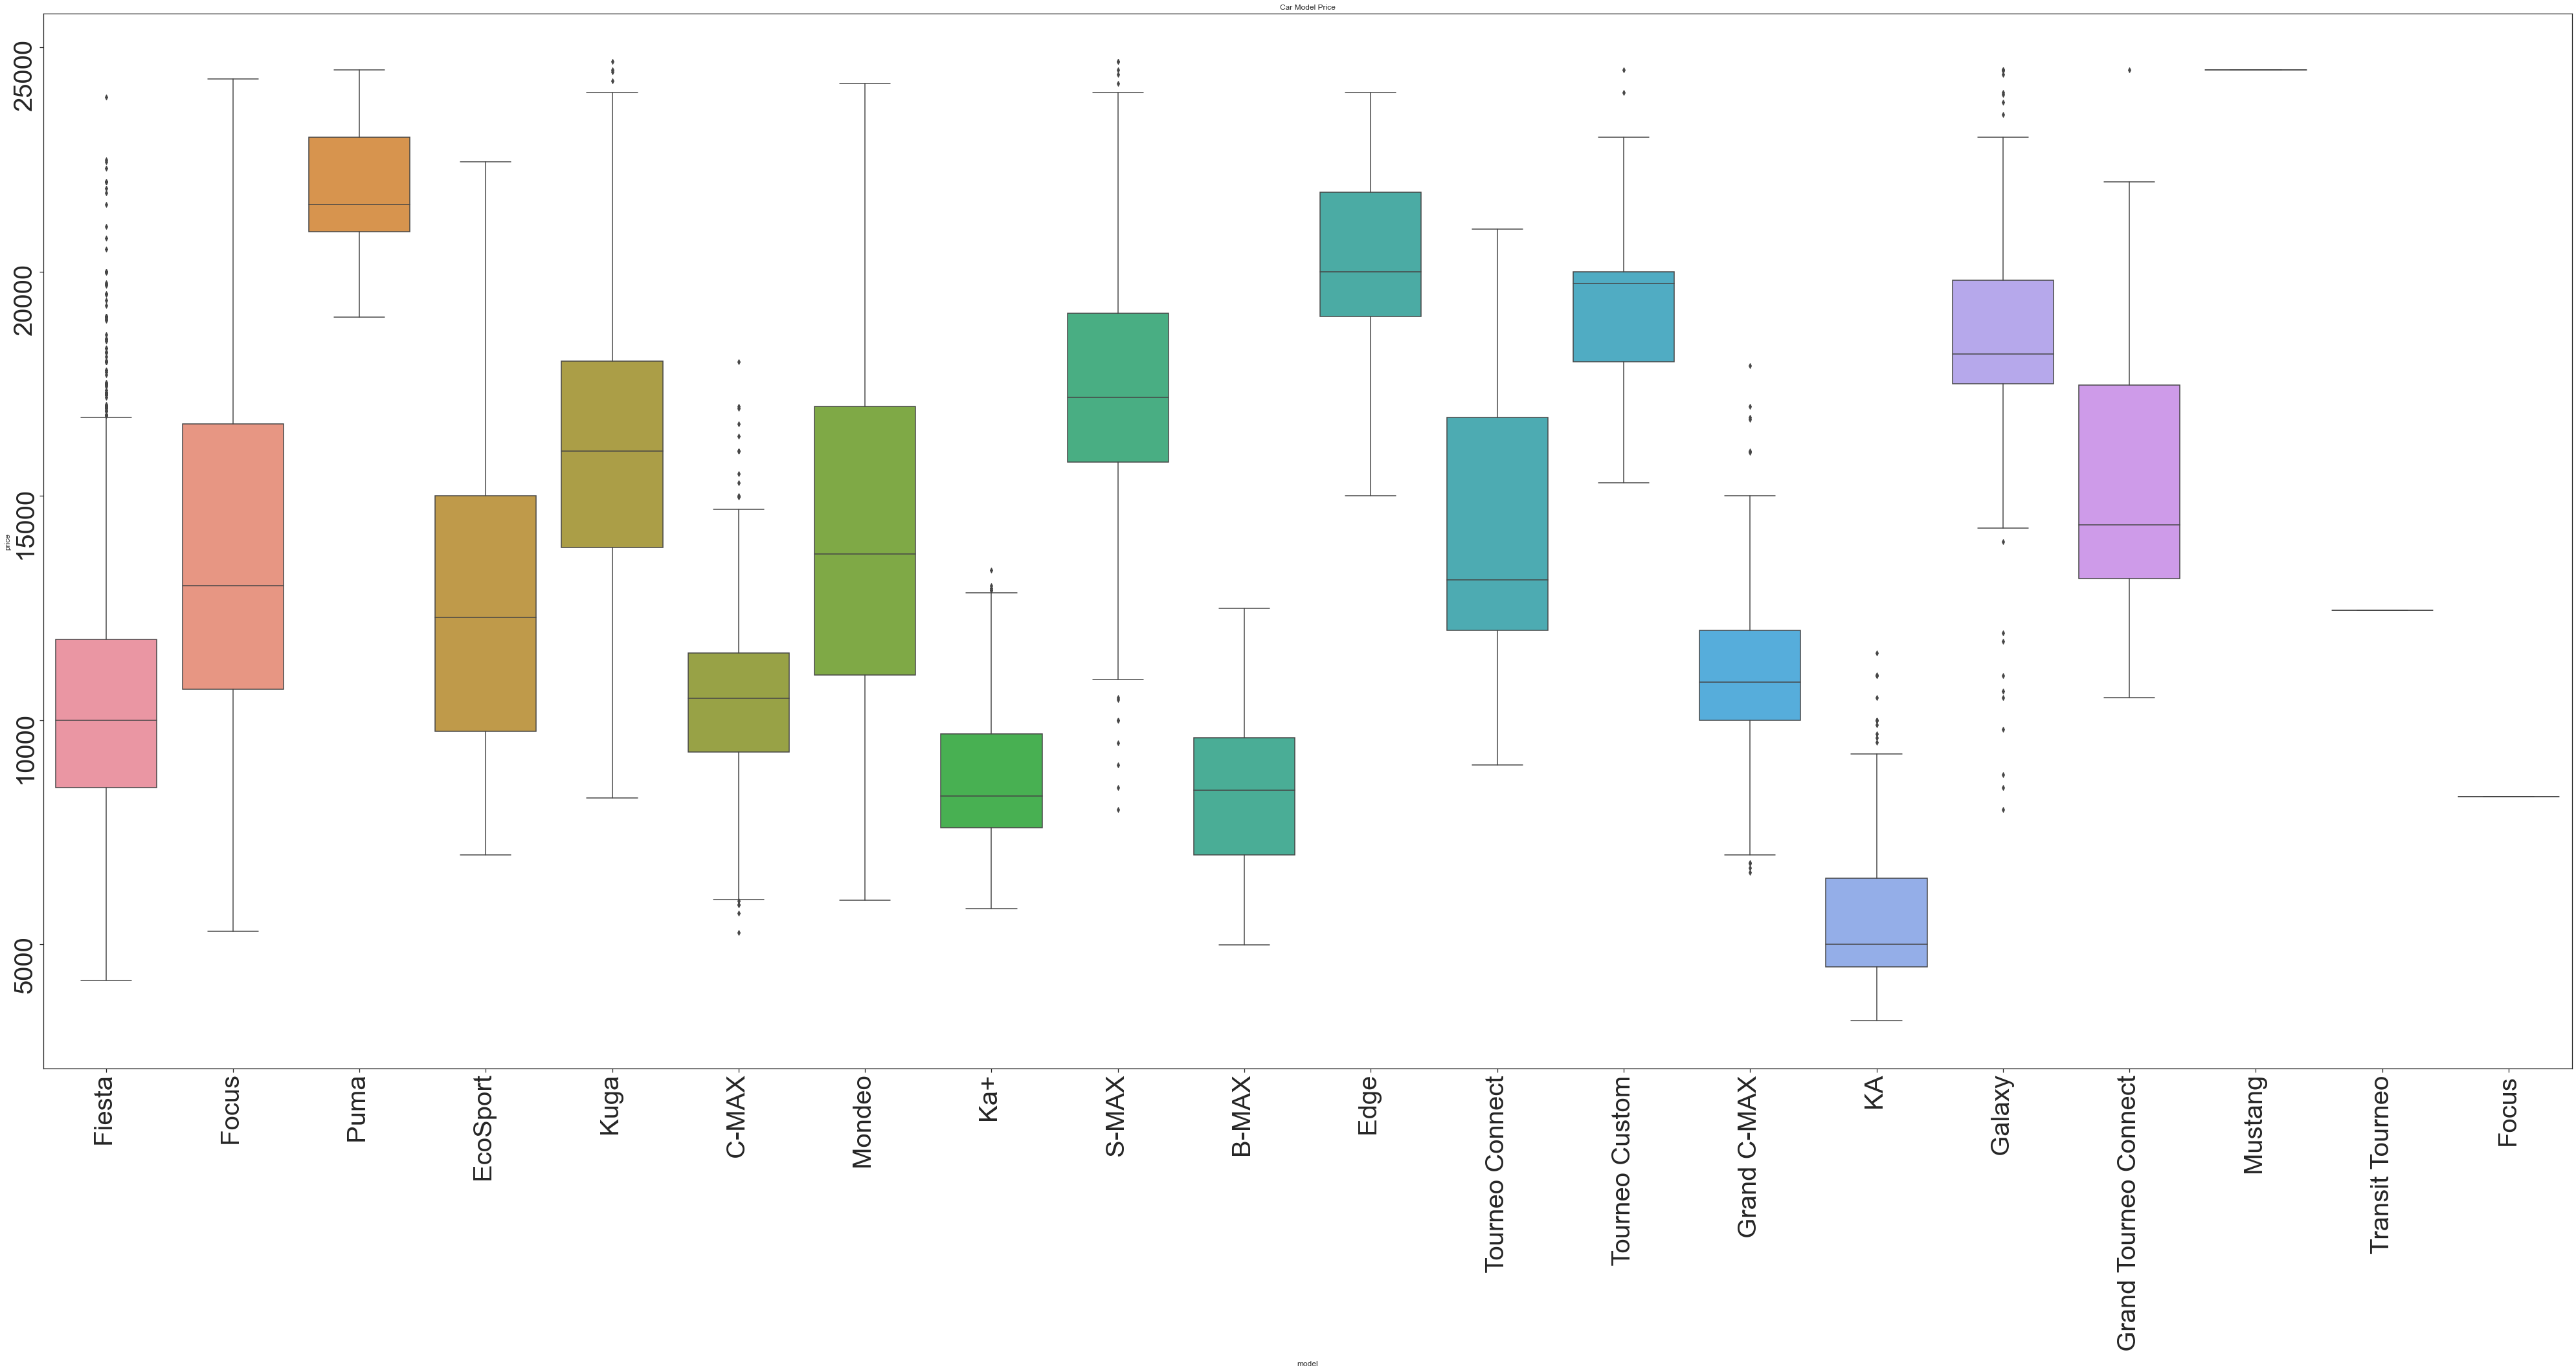

In [135]:
#price of the car models
plt.figure(figsize=(70,30))
sns.boxplot(x=clean_data.model,y=clean_data.price)
plt.title('Car Model Price')
plt.tick_params(axis='x',rotation=90, labelsize=40)
plt.tick_params(axis='y',rotation=90, labelsize=40)

Fiesta, focus and Kuga are the most, they also have a resonable price.

Text(0.5, 1.0, 'transmission')

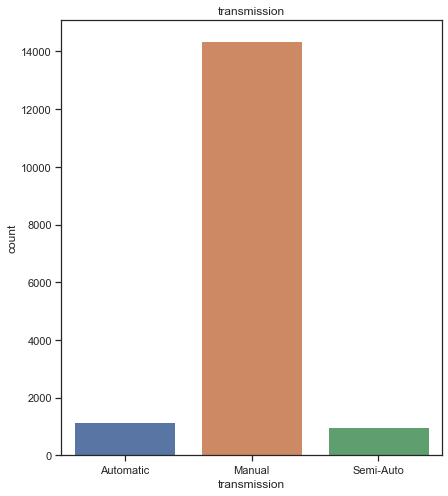

In [136]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
sns.countplot(x=clean_data.transmission)
plt.title('transmission')

Manual mode of transmission is most common

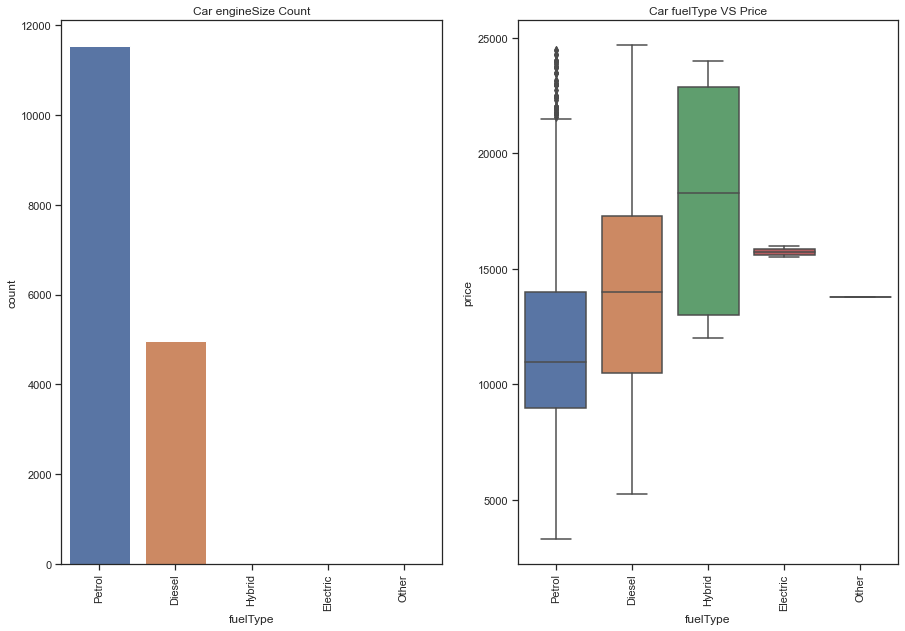

In [137]:
fig,axes = plt.subplots(1,2,figsize=(15,10))

sns.countplot(x=clean_data.fuelType,ax=axes[0])
axes[0].set_title('Car engineSize Count')
axes[0].tick_params(axis='x',rotation=90)



sns.boxplot(x=clean_data.fuelType,y=clean_data.price,ax=axes[1])
axes[1].set_title('Car fuelType VS Price')
axes[1].tick_params(axis='x',rotation=90)

cars run by Petrol has the most count, folllowed by diesel. The price for cars fun by 'Hybrid' is most expensive. Electric and others are neglegile.

__converting the categorical value to numerical value using ordinal encoder:__

OrdinalEncoder is used to encode categorical features as an integer array. There are other techniques for converting the categorical variable to numerical variable.

In [138]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc= OrdinalEncoder(dtype=int)
clean_data[["model_code","transmission_code","fuelType_code"]] = ord_enc.fit_transform(clean_data[["model","transmission","fuelType"]])
clean_data[["model_code","transmission_code","fuelType_code","model","transmission","fuelType","year",'price','mileage','tax','mpg']].head(11)

/Users/arya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,model_code,transmission_code,fuelType_code,model,transmission,fuelType,year,price,mileage,tax,mpg
0,4,0,4,Fiesta,Automatic,Petrol,2017,12000,15944,150,57.7
1,5,1,4,Focus,Manual,Petrol,2018,14000,9083,150,57.7
2,5,1,4,Focus,Manual,Petrol,2017,13000,12456,150,57.7
3,4,1,4,Fiesta,Manual,Petrol,2019,17500,10460,145,40.3
4,4,0,4,Fiesta,Automatic,Petrol,2019,16500,1482,145,48.7
5,4,1,4,Fiesta,Manual,Petrol,2015,10500,35432,145,47.9
6,14,1,4,Puma,Manual,Petrol,2019,22500,2029,145,50.4
7,4,1,4,Fiesta,Manual,Petrol,2017,9000,13054,145,54.3
9,5,1,4,Focus,Manual,Petrol,2018,10000,48141,145,61.4
10,4,1,4,Fiesta,Manual,Petrol,2018,11561,18803,145,56.5


In [139]:
clean_data=clean_data.drop(columns=["model","transmission","fuelType"])
clean_data.head()

,year,price,mileage,tax,mpg,engineSize,model_code,transmission_code,fuelType_code
0,2017,12000,15944,150,57.7,1.0,4,0,4
1,2018,14000,9083,150,57.7,1.0,5,1,4
2,2017,13000,12456,150,57.7,1.0,5,1,4
3,2019,17500,10460,145,40.3,1.5,4,1,4
4,2019,16500,1482,145,48.7,1.0,4,0,4


In [140]:
# get the correlations between model, year, mileage, fuelType and price
corr_model = clean_data['model_code'].corr(clean_data['price']) 
corr_year = clean_data['year'].corr(clean_data['price'])
corr_tranmission = clean_data['transmission_code'].corr(clean_data['price'])
corr_mileage = clean_data['mileage'].corr(clean_data['price'])
corr_fuelType = clean_data['fuelType_code'].corr(clean_data['price'])
corr_mpg= clean_data['mpg'].corr(clean_data['price'])
corr_tax = clean_data['tax'].corr(clean_data['price'])
corr_engineSize = clean_data['engineSize'].corr(clean_data['price'])



print('corr_model: ', corr_model)
print('corr_year: ', corr_year)
print('corr_tranmission: ', corr_tranmission)
print('corr_mileage: ', corr_mileage)
print('corr_fuelType: ', corr_fuelType)
print('corr_mpg: ', corr_mpg)
print('corr_tax: ', corr_tax)
print('corr_engineSize: ', corr_engineSize)

corr_model:  0.3626762437817754
corr_year:  0.634549797499253
corr_tranmission:  -0.06685742804921911
corr_mileage:  -0.4748671287991022
corr_fuelType:  -0.2733875594968124
corr_mpg:  -0.36698922478847384
corr_tax:  0.4870051096630284
corr_engineSize:  0.3975561402930128


In [141]:
#claculation between the diffrent feature
clean_data[["model_code","year", "mileage","mpg","tax","engineSize","transmission_code","fuelType_code", "price"]].corr()

,model_code,year,mileage,mpg,tax,engineSize,transmission_code,fuelType_code,price
model_code,1.000000,0.061193,0.044336,-0.231448,0.191482,0.521507,-0.050572,-0.410153,0.362676
year,0.061193,1.000000,-0.665645,-0.137125,0.517917,-0.152780,-0.043656,0.105108,0.634550
mileage,0.044336,-0.665645,1.000000,0.195626,-0.367142,0.230060,0.046287,-0.255831,-0.474867
mpg,-0.231448,-0.137125,0.195626,1.000000,-0.483230,-0.201060,0.028439,-0.296636,-0.366989
tax,0.191482,0.517917,-0.367142,-0.483230,1.000000,0.146218,-0.043149,0.103992,0.487005
engineSize,0.521507,-0.152780,0.230060,-0.201060,0.146218,1.000000,-0.017773,-0.748483,0.397556
transmission_code,-0.050572,-0.043656,0.046287,0.028439,-0.043149,-0.017773,1.000000,0.001529,-0.066857
fuelType_code,-0.410153,0.105108,-0.255831,-0.296636,0.103992,-0.748483,0.001529,1.000000,-0.273388
price,0.362676,0.634550,-0.474867,-0.366989,0.487005,0.397556,-0.066857,-0.273388,1.000000


#### From the results, we may get several observations:
### most correlated features:
- correlation of price with year: __0.634550__
- correlation of price with mileage: __-0.474867__
- correlation of price with mpg: __-0.366989__
- correlation of price with tax: __0.487005__
- correlation of price with engine size: __0.397556__
- correlation of price with model_code: __0.362676__

### Least correlated features:

- correlation of price with transmission_code: __-0.066857__
- correlation of price with fuelType_code: __-0.273388__

<AxesSubplot:>

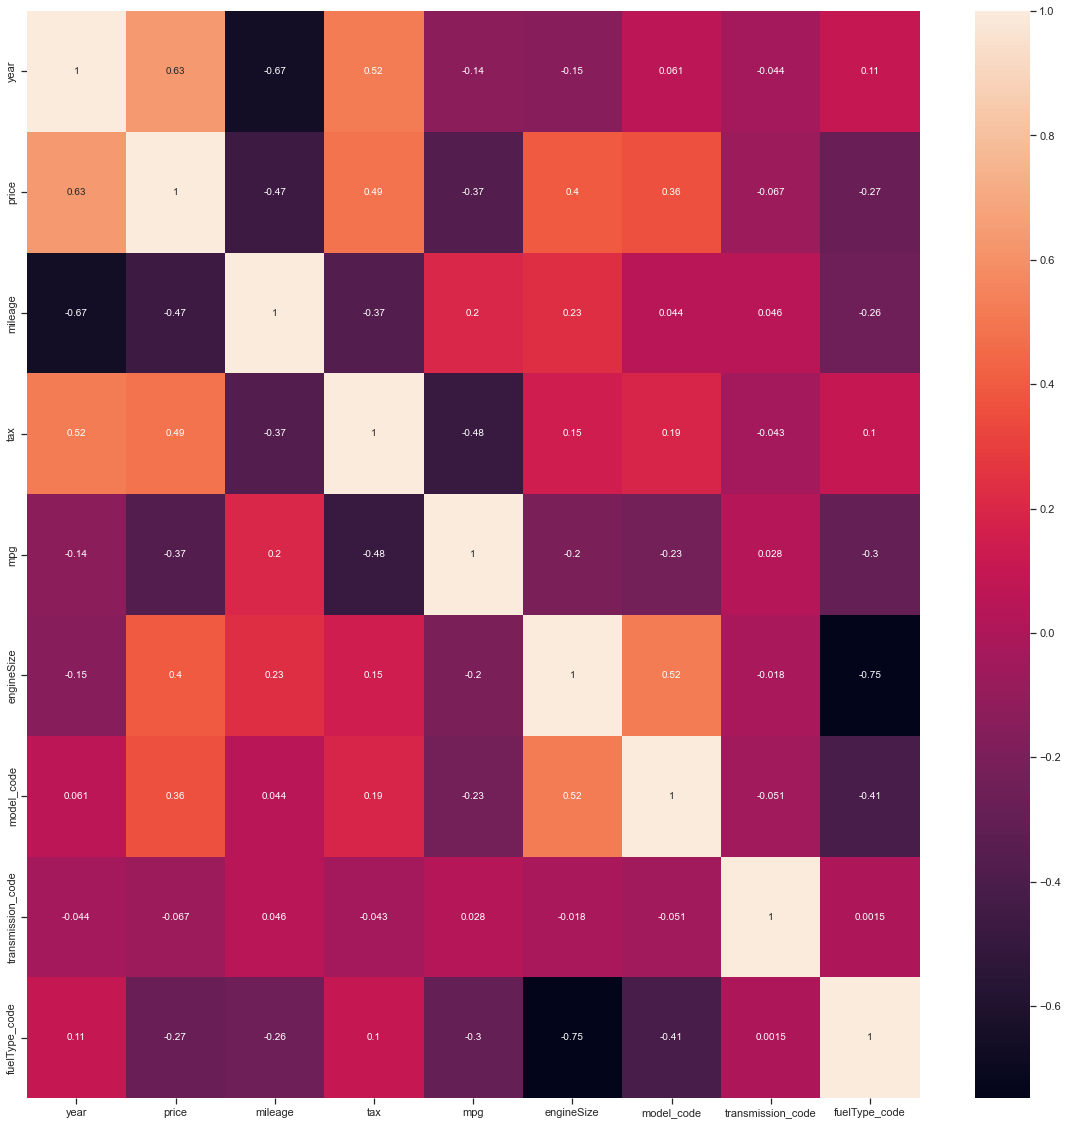

In [142]:
#visualisation of the correlation between different figures using the heat map
from matplotlib import *
import sys
import pylab as pl
pl.figure(figsize = (20, 20))
sns.heatmap(clean_data.corr(), annot = True)

In the above visualisation we can see that:
- the mileage has negative-high correlation with price. The price is higher when the mileage is lower.
- the year has positive-high relation with the price. The price tends to be higher as the year increases.

__building the model__
- using the most positively correlated feature - year
- using the most negatively correlated feature - mileage

- using two least positively correlated feature - transmission_code ,fuelType_code

To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
- training data containing 10% of the entire data
- training data containing 90% of the entire data.

In [143]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [144]:
feature_cols = ['year','mileage']
X1 = clean_data[feature_cols]
Y1 = clean_data['price']
model = LinearRegression()
model.fit(X1, Y1)

LinearRegression()

In [145]:
 print("Y1 = ", model.coef_, "* x + ", model.intercept_)

Y1 =  [ 1.48162277e+03 -2.71711525e-02] * x +  -2975683.6862181225


In [146]:
#model a
#genre,age-most correlated case 1
reg = linear_model.LinearRegression()

train,test= train_test_split(clean_data, test_size=0.9,random_state=142)

X1_train = train[['year', 'mileage']]
Y1_train = train['price']

X1_test = test[['year', 'mileage']]
Y1_test = test['price']

reg.fit(X1_train, Y1_train)

print('Model A:')
print('X1 train shape:',X1_train.shape)
print('Y1 train shape:', Y1_train.shape)
print("X1 test shape:", X1_test.shape)
print("Y1 test shape:",Y1_test.shape)

predicted = reg.predict(X1_test)

A_mse = ((np.array(Y1_test)-predicted)**2).sum()/len(Y1_test)
A_rmse=np.sqrt(A_mse)
r2 = r2_score(Y1_test, predicted)


print("MSE:",A_mse)
print("ROOt MSE:",A_rmse)
print("R square", r2)

Model A:
X1 train shape: (1650, 2)
Y1 train shape: (1650,)
X1 test shape: (14857, 2)
Y1 test shape: (14857,)
MSE: 9290697.301044146
ROOt MSE: 3048.0645172049994
R square 0.4046547853710172


In [147]:
#case1
#least important case 2
reg = linear_model.LinearRegression()

X2_train = train[['transmission_code' ,'fuelType_code']]
Y2_train = train['price']

X2_test = test[['transmission_code' ,'fuelType_code']]
Y2_test = test['price']

reg.fit(X2_train, Y2_train)

train,test= train_test_split(clean_data, test_size=0.9,random_state=142)

print("Model B:")
print('X1 train shape:',X2_train.shape)
print('Y1 train shape:', Y2_train.shape)
print("X1 test shape:", X2_test.shape)
print("Y1 test shape:",Y2_test.shape)

predicted = reg.predict(X2_test)

B_mse = ((np.array(Y2_test)-predicted)**2).sum()/len(Y2_test)
B_rmse = np.sqrt(B_mse)
r2 = r2_score(Y2_test, predicted)


print("MSE:",B_mse)
print("ROOt MSE:",B_rmse)
print("R square", r2)

Model B:
X1 train shape: (1650, 2)
Y1 train shape: (1650,)
X1 test shape: (14857, 2)
Y1 test shape: (14857,)
MSE: 14420273.923226194
ROOt MSE: 3797.4035765541425
R square 0.07595298870979439


In [148]:
reg = linear_model.LinearRegression()

train,test= train_test_split(clean_data, test_size=0.1,random_state=142)

X1_train = train[['year', 'mileage']]
Y1_train = train['price']

X1_test = test[['year', 'mileage']]
Y1_test = test['price']

reg.fit(X1_train, Y1_train)

print('Model A:')
print('X1 train shape:',X1_train.shape)
print('Y1 train shape:', Y1_train.shape)
print("X1 test shape:", X1_test.shape)
print("Y1 test shape:",Y1_test.shape)

predicted = reg.predict(X1_test)

C_mse = ((np.array(Y1_test)-predicted)**2).sum()/len(Y1_test)
C_rmse=np.sqrt(A_mse)
r2 = r2_score(Y1_test, predicted)


print("MSE:",C_mse)
print("ROOt MSE:",C_rmse)
print("R square", r2)

Model A:
X1 train shape: (14856, 2)
Y1 train shape: (14856,)
X1 test shape: (1651, 2)
Y1 test shape: (1651,)
MSE: 9111756.920693913
ROOt MSE: 3048.0645172049994
R square 0.42251364306031347


In [149]:
reg = linear_model.LinearRegression()

X2_train = train[['transmission_code' ,'fuelType_code']]
Y2_train = train['price']

X2_test = test[['transmission_code' ,'fuelType_code']]
Y2_test = test['price']

reg.fit(X2_train, Y2_train)

train,test= train_test_split(clean_data, test_size=0.1,random_state=142)

print("Model B:")
print('X1 train shape:',X2_train.shape)
print('Y1 train shape:', Y2_train.shape)
print("X1 test shape:", X2_test.shape)
print("Y1 test shape:",Y2_test.shape)

predicted = reg.predict(X2_test)

D_mse = ((np.array(Y2_test)-predicted)**2).sum()/len(Y2_test)
D_rmse = np.sqrt(B_mse)
r2 = r2_score(Y2_test, predicted)


print("MSE:",D_mse)
print("ROOt MSE:",D_rmse)
print("R square", r2)

Model B:
X1 train shape: (14856, 2)
Y1 train shape: (14856,)
X1 test shape: (1651, 2)
Y1 test shape: (1651,)
MSE: 14358711.037678137
ROOt MSE: 3797.4035765541425
R square 0.08997136340782319


<BarContainer object of 4 artists>

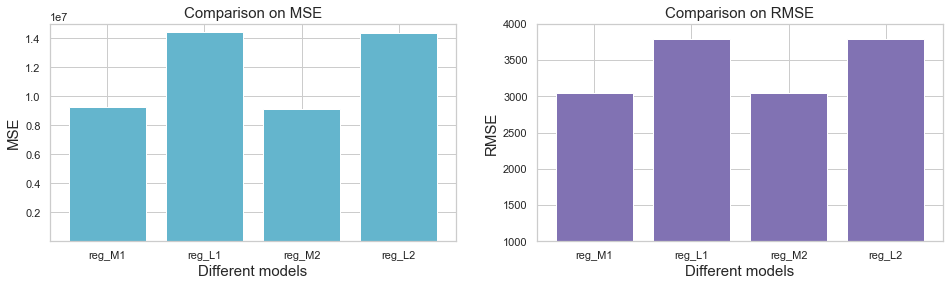

In [150]:
# create dataframe for the mse values and rmse values
mse_df = pd.DataFrame({'mse': [A_mse , B_mse , C_mse , D_mse ]}, index=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'])
rmse_df = pd.DataFrame({'rmse': [A_rmse, B_rmse, C_rmse, D_rmse]}, index=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'])

# plot figures to show the mse and rmse results of different cases
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.ylim(1000,15000000)
plt.xlabel('Different models', size=15)
plt.ylabel('MSE', size=15)
plt.title("Comparison on MSE", size=15)
plt.bar(data=mse_df, height='mse', x=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'], color='c')
plt.subplot(1, 2, 2)
plt.ylim(1000,4000)
plt.xlabel('Different models', size=15)
plt.ylabel('RMSE', size=15)
plt.title("Comparison on RMSE", size=15)
plt.bar(data=rmse_df, height='rmse', x=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'], color='m')

__slpitting the entire dataset for the baseline model:__

In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer

In [152]:
feature = ["model_code","year","mileage","mpg","engineSize","transmission_code" ,"fuelType_code"]
target = "price"

X = clean_data[feature]
y = clean_data[target]
# split data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=142)

In [153]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

print("Mean car price:", y_mean)
print("Mean Absolute Error for Baseline Model:",mean_absolute_error(y_train,y_pred_baseline).round(2))

Mean car price: 12375.738280954183
Mean Absolute Error for Baseline Model: 3298.64


In [154]:
km = KMeans(n_clusters=2)
km.fit(clean_data)

KMeans(n_clusters=2)

In [155]:
clean_data['label'] = km.predict(clean_data)

In [156]:
clean_data_mean = clean_data.groupby(['label']).agg('mean')
clean_data_mean

,year,price,mileage,tax,mpg,engineSize,model_code,transmission_code,fuelType_code
label,,,,,,,,,
0,2017.696677,13432.659653,12332.680874,126.497381,57.238712,1.262272,5.475257,0.981578,3.077750
1,2015.932082,10200.595435,36617.000736,86.026137,60.232836,1.417927,5.751887,1.008467,2.220504


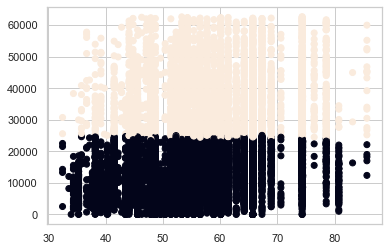

In [157]:
plt.scatter(clean_data['mpg'], clean_data['mileage'], c=clean_data['label'])

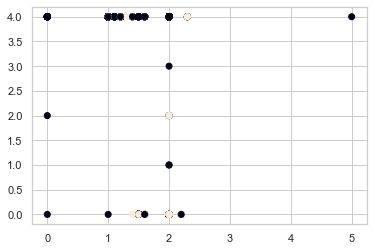

In [158]:
plt.scatter(clean_data['engineSize'], clean_data['fuelType_code'], c=clean_data['label'])

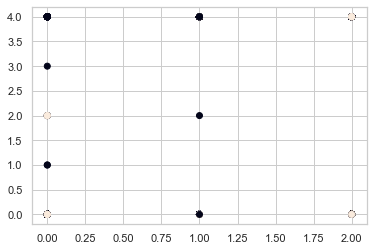

In [169]:
plt.scatter(clean_data['transmission_code'], clean_data['fuelType_code'], c=clean_data['label'])

In [159]:
dist = pdist(clean_data, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

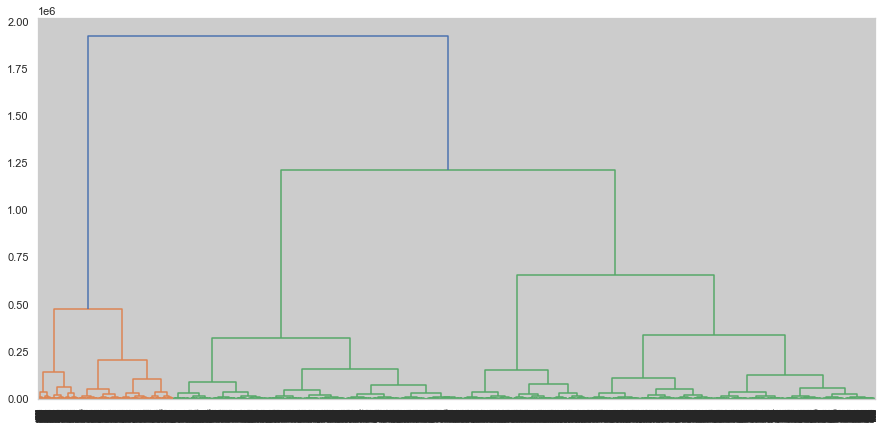

In [170]:
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

In [161]:
dist = pdist(X, 'euclidean')
linkage_matrix = linkage(dist, method = 'ward')  # or 'complete'

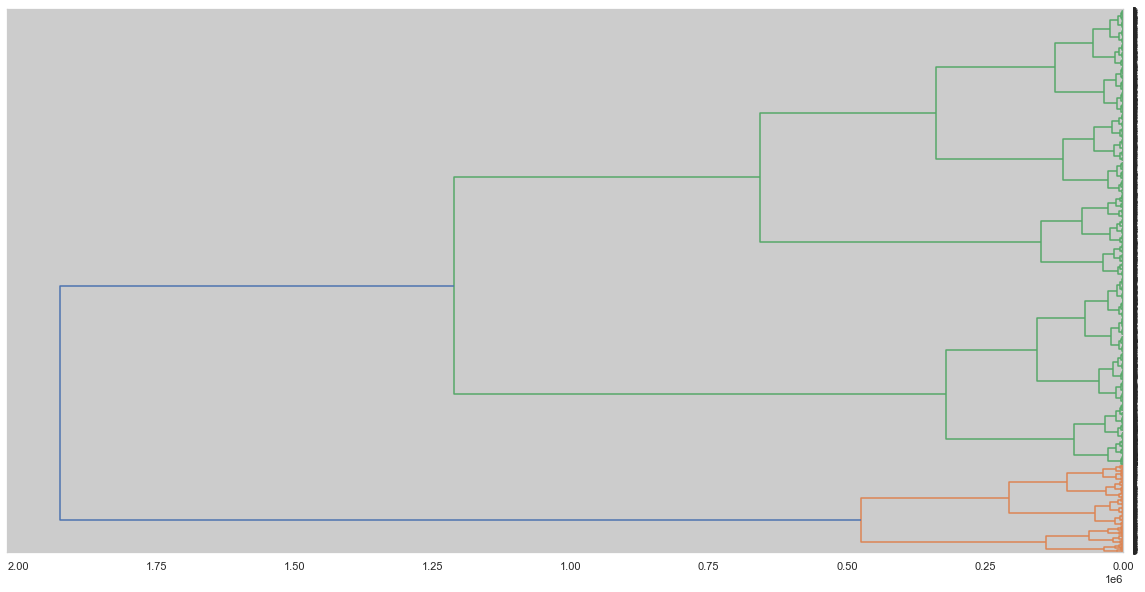

In [163]:
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, labels=list(clean_data.model_code), orientation='left')
plt.show()

In [52]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [168]:
# Produce the features of a testing data instance
X_new = np.array([[2017,1400,9083,150,57.7,1.0,5,1,4]])
print("X_new.shape: {}".format(X_new.shape))

# Predict the result label of X_new:
X_new = X.reshape(len(X_new), -1)
y_new_pred = clf_knn.predict(X_new)
print("The predicted class is: \n", y_new_pred)

X_new.shape: (1, 9)


AttributeError: 'DataFrame' object has no attribute 'reshape'